In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [30]:
# Load and preprocess dataset
df = pd.read_csv('Trading-features.csv').dropna().drop_duplicates().sample(frac=1).reset_index(drop=True)
df['created_at'] = pd.to_datetime(df['created_at'])
df['date'] = df['created_at'].dt.strftime('%Y-%m-%d')
df['created_at'] = df['created_at'].dt.strftime('%H:%M:%S')
df.set_index('created_at', inplace=True)
df['last_price'] = pd.to_numeric(df['last_price'], errors='coerce')

/Users/hwaqar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


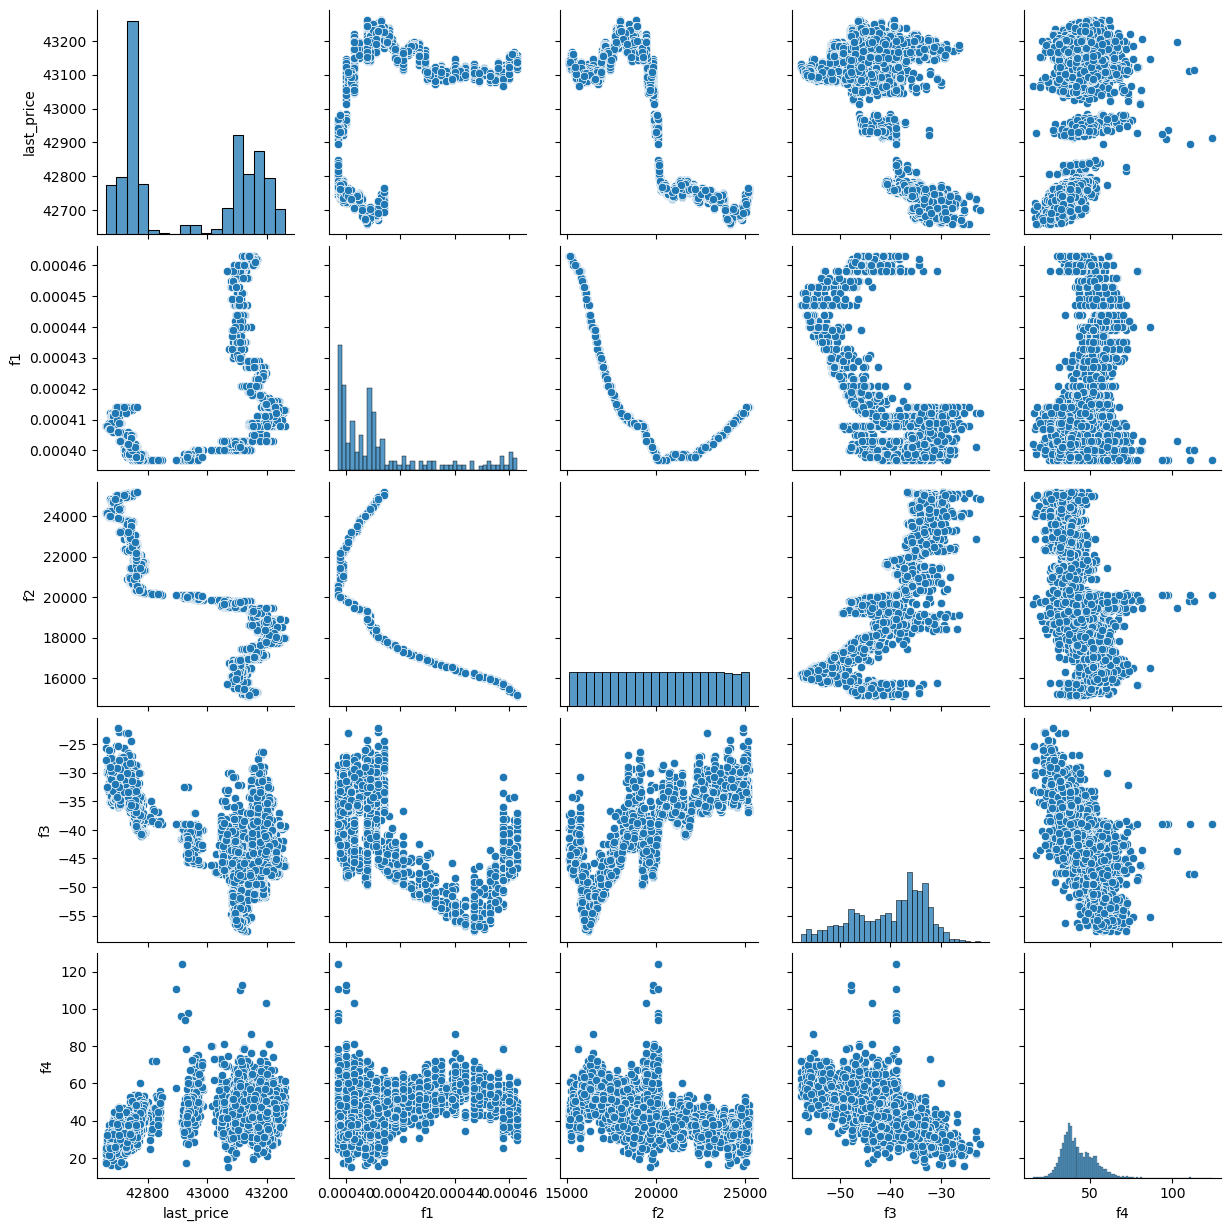

In [31]:
# Pair plot
selected_columns = ['last_price', 'f1', 'f2', 'f3', 'f4']
sns.pairplot(df[selected_columns])
plt.show()

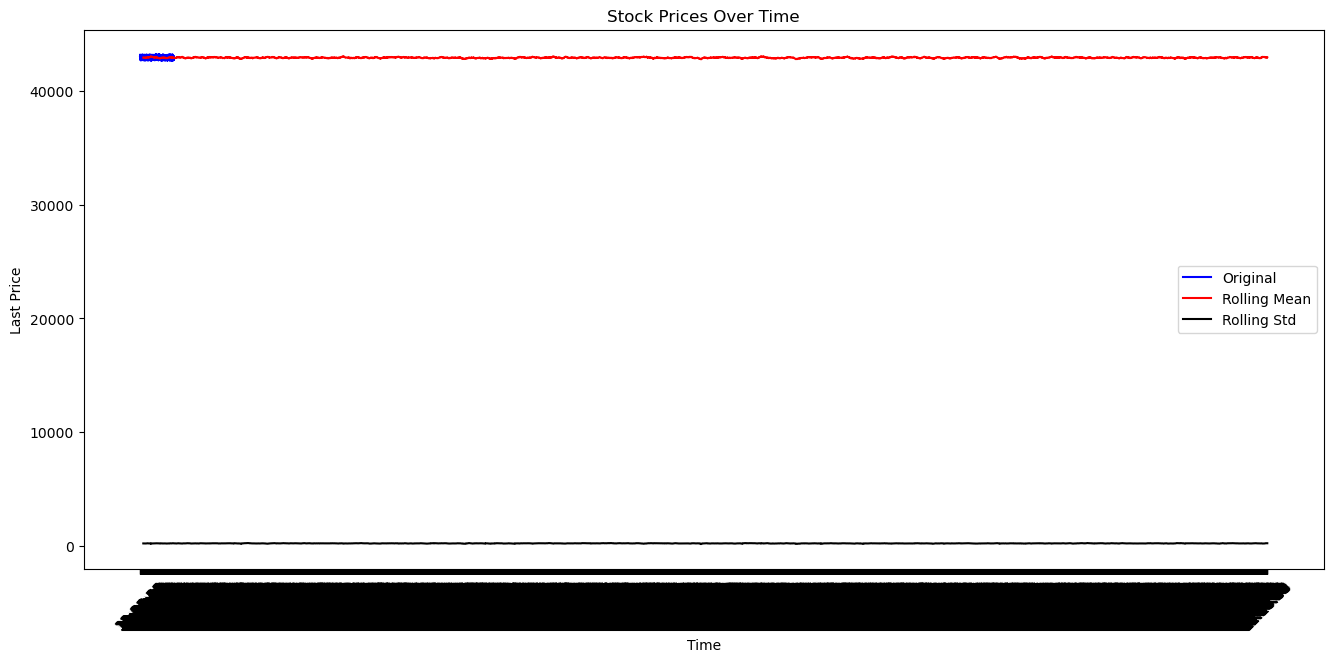

In [32]:
# Rolling mean and std
rolmean = df['last_price'].rolling(window=30).mean()
rolstd = df['last_price'].rolling(window=30).std()
plt.figure(figsize=(16, 7))
plt.plot(df['last_price'][:300], color='blue', label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label='Rolling Std')
plt.title('Stock Prices Over Time')
plt.xlabel('Time')
plt.ylabel('Last Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Text(0.5, 0.98, '\nAdditive Decompose')

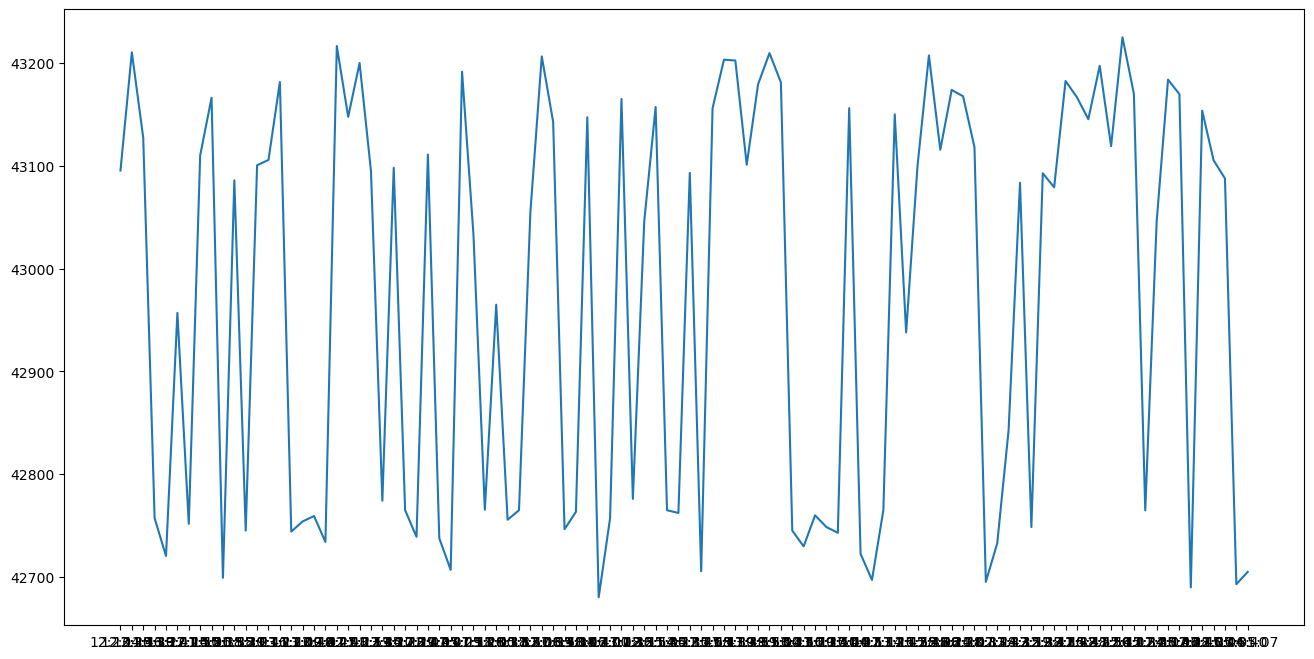

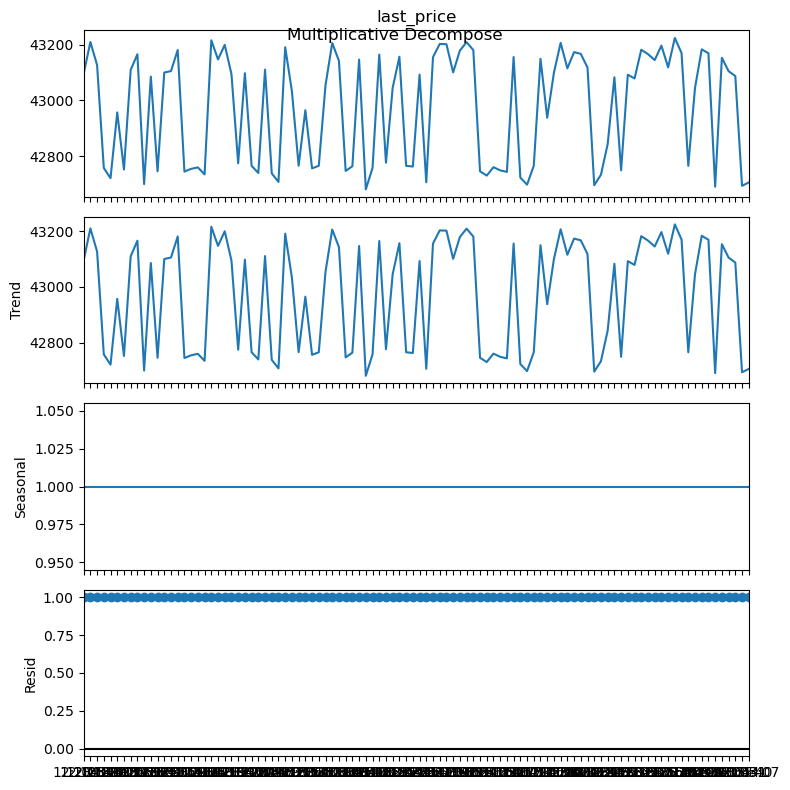

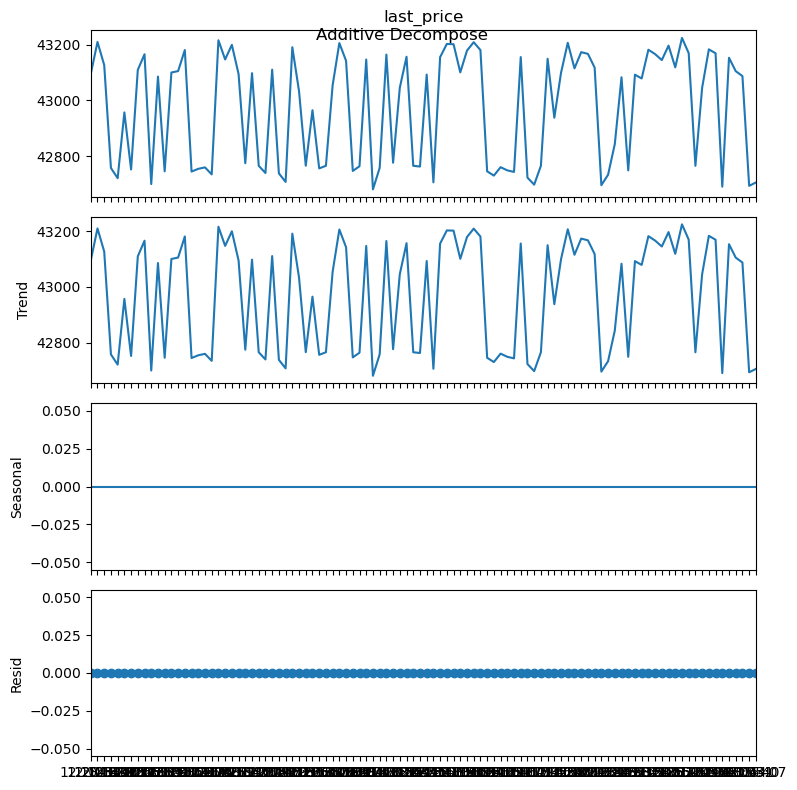

In [33]:
# Multiplicative and additive decomposition
plt.rcParams.update({'figure.figsize': (16, 8)})
plt.plot(df['last_price'][:100])
mul_result = seasonal_decompose(df['last_price'][:100], model='multiplicative', period=1)
ad_result = seasonal_decompose(df['last_price'][:100], model='additive', period=1)
plt.rcParams.update({'figure.figsize': (8, 8)})
mul_result.plot().suptitle('\nMultiplicative Decompose', fontsize=12)
plt.rcParams.update({'figure.figsize': (8, 8)})
ad_result.plot().suptitle('\nAdditive Decompose', fontsize=12)

In [34]:
# Augmented Dickey-Fuller test
adf_result = adfuller(df['last_price'], autolag='AIC')
print('ADF value:', adf_result[0])
print('P-value:', adf_result[1])

ADF value: -102.17970641175552
P-value: 0.0


In [35]:
# Create binary target variable using shift
df['target'] = (df['last_price'].shift(-1) > df['last_price']).astype(int)

In [36]:
# Drop non-numeric columns and Confusion Matrix and SVC Model
X = df.select_dtypes(include=['float64', 'int64']).drop(['target'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Train SVC model with probability=True
svc_model = SVC(probability=True).fit(X_train, y_train)
y_prob = svc_model.predict_proba(X_test)[:, 1]

In [38]:
# Adjust threshold and evaluate accuracy
threshold = 0.4
y_pred_adjusted = (y_prob > threshold).astype(int)
accuracy_adjusted = accuracy_score(y_test, y_pred_adjusted)
print(f"Accuracy with adjusted threshold: {accuracy_adjusted}")

Accuracy with adjusted threshold: 0.7094188376753507


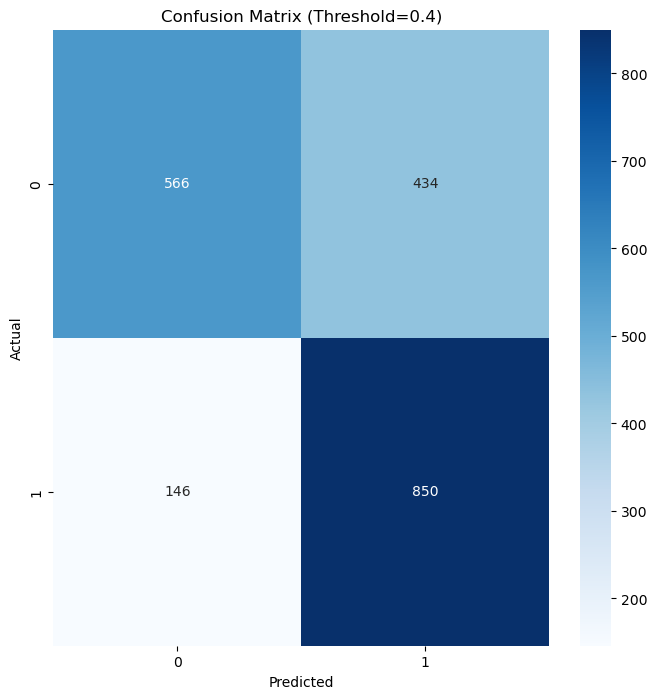

In [39]:
# Confusion Matrix with adjusted threshold
conf_matrix_adjusted = confusion_matrix(y_test, y_pred_adjusted)
sns.heatmap(conf_matrix_adjusted, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Threshold={threshold})')
plt.show()

/Users/hwaqar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


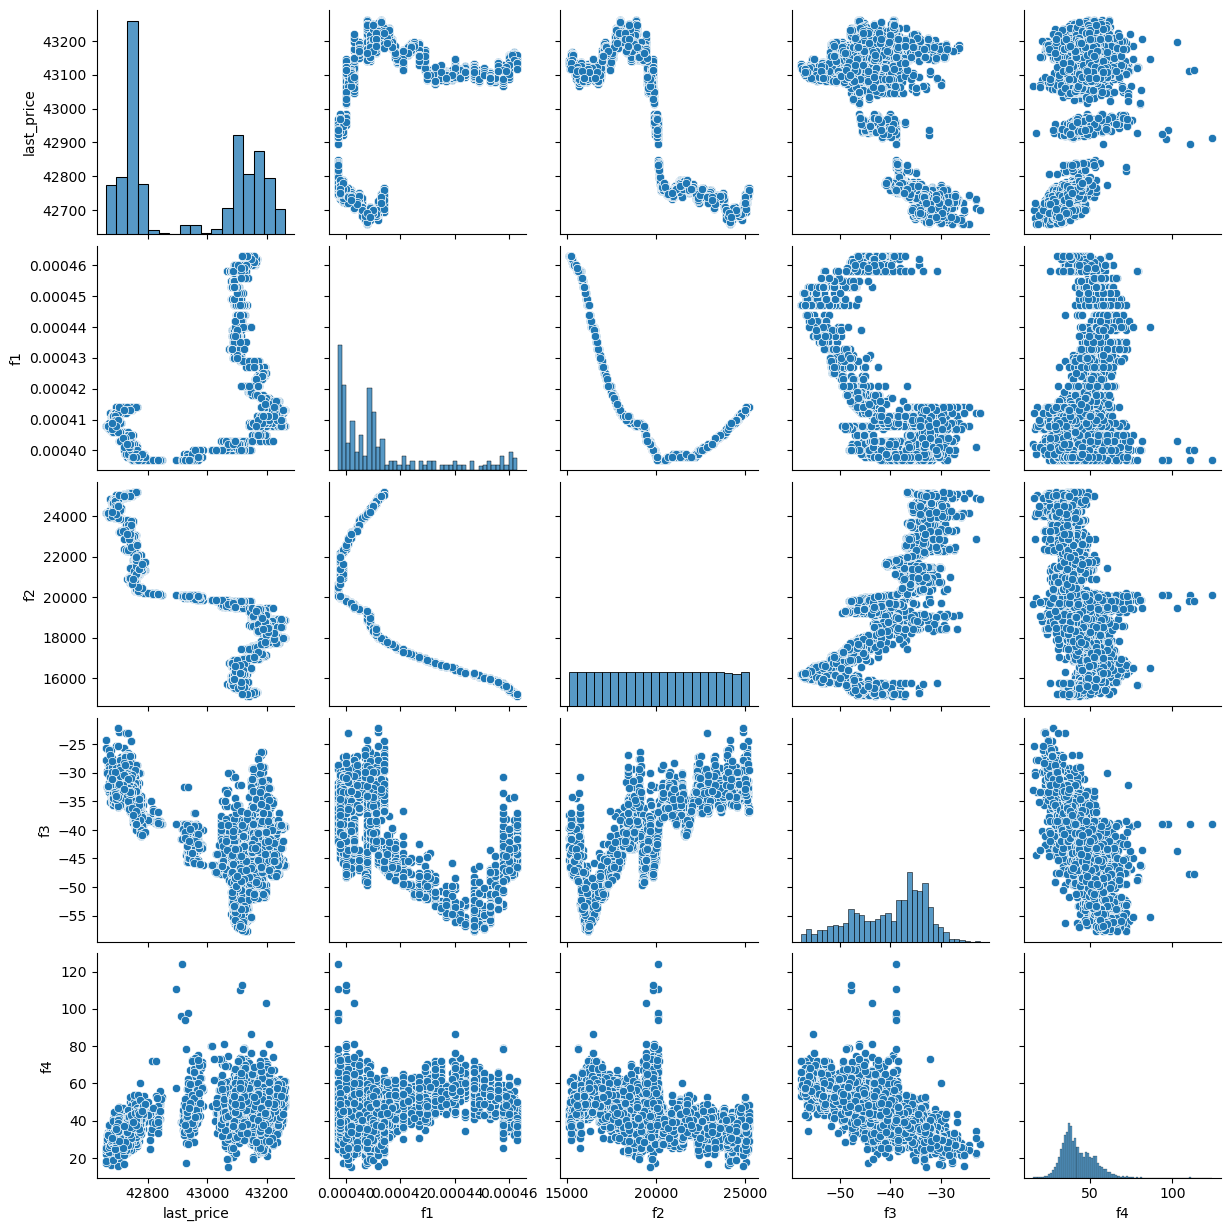

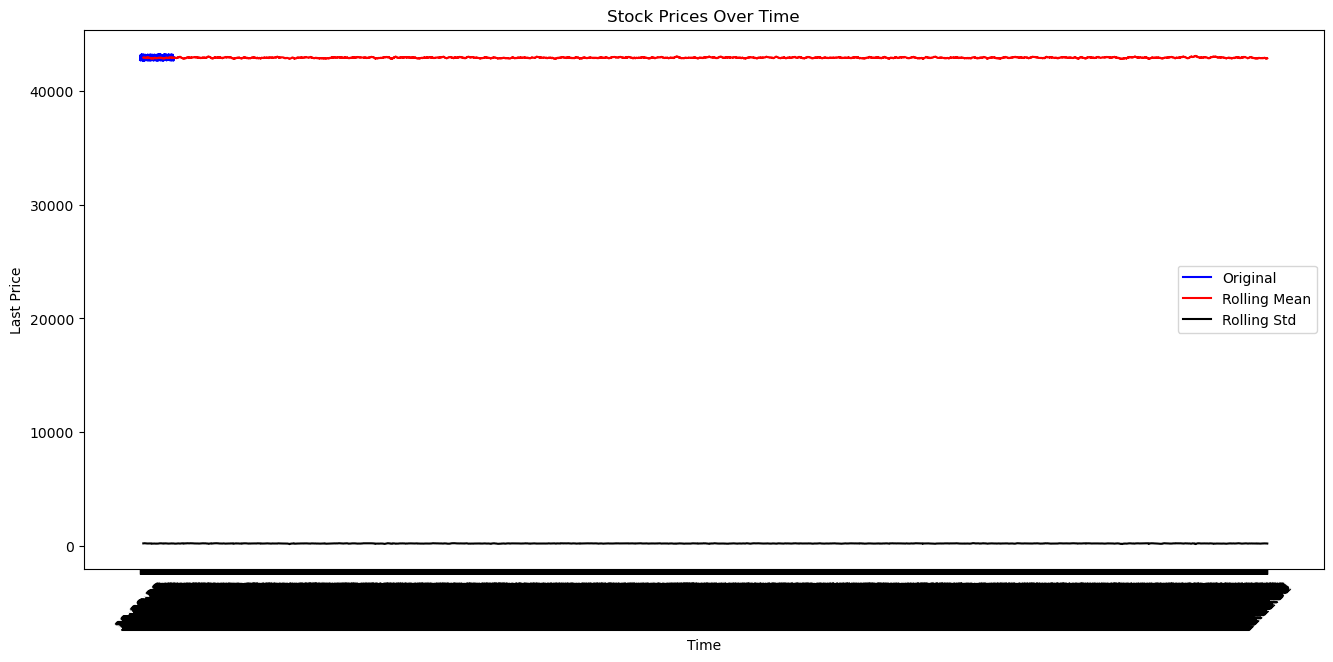

ADF value: -72.10818195738864
P-value: 0.0
Accuracy with adjusted threshold: 0.7419839679358717


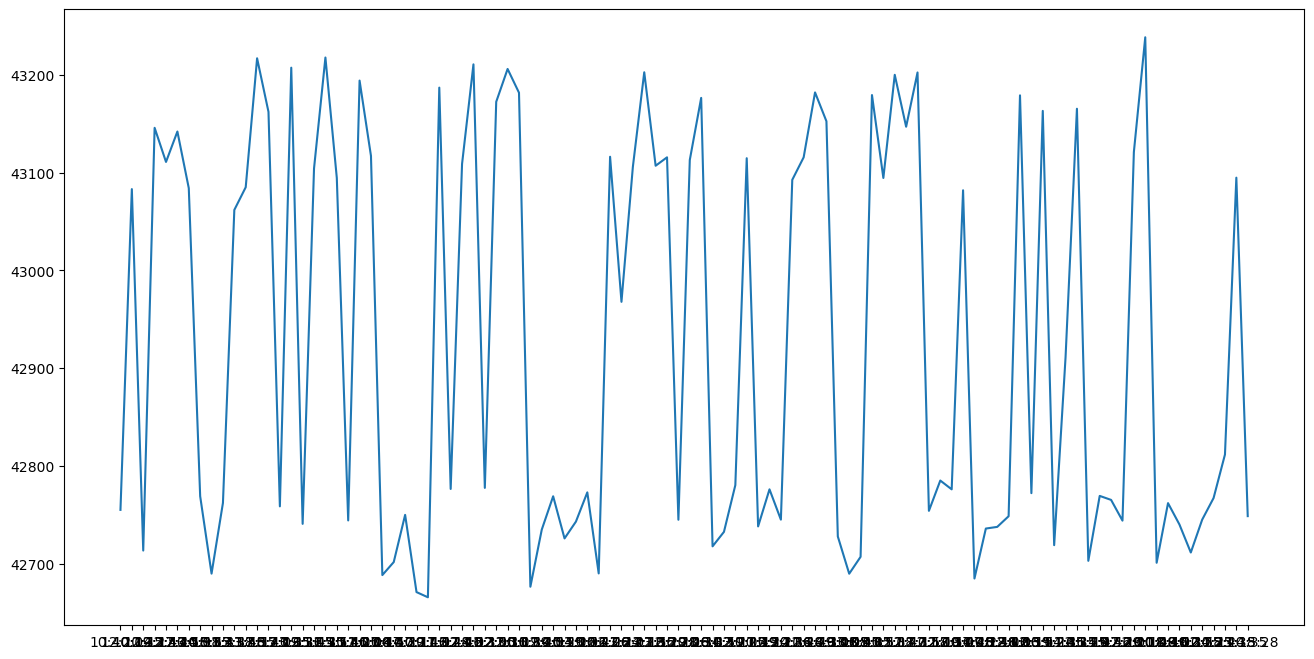

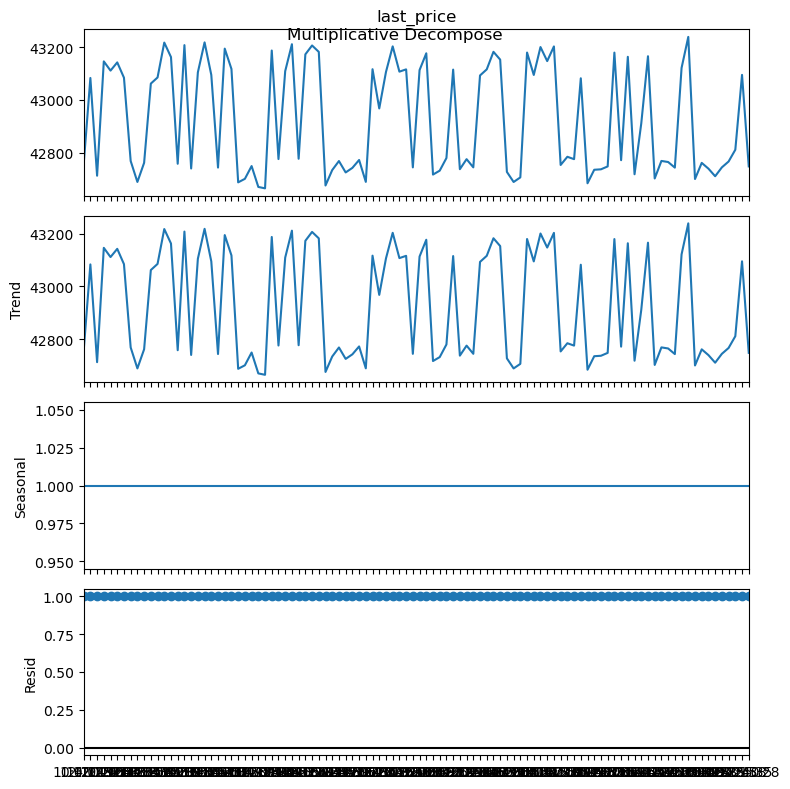

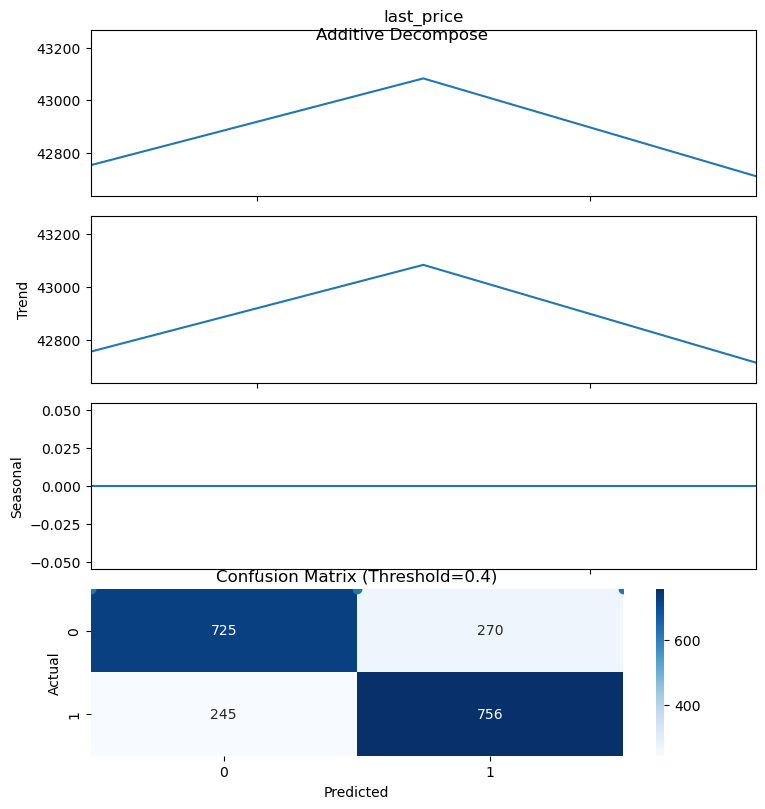

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler


# Load and preprocess dataset
df = pd.read_csv('Trading-features.csv').dropna().drop_duplicates().sample(frac=1).reset_index(drop=True)
df['created_at'] = pd.to_datetime(df['created_at'])
df['date'] = df['created_at'].dt.strftime('%Y-%m-%d')
df['created_at'] = df['created_at'].dt.strftime('%H:%M:%S')
df.set_index('created_at', inplace=True)
df['last_price'] = pd.to_numeric(df['last_price'], errors='coerce')

# Pair plot
selected_columns = ['last_price', 'f1', 'f2', 'f3', 'f4']
sns.pairplot(df[selected_columns])
plt.show()

# Rolling mean and std
rolmean = df['last_price'].rolling(window=30).mean()
rolstd = df['last_price'].rolling(window=30).std()
plt.figure(figsize=(16, 7))
plt.plot(df['last_price'][:300], color='blue', label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label='Rolling Std')
plt.title('Stock Prices Over Time')
plt.xlabel('Time')
plt.ylabel('Last Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Multiplicative and additive decomposition
plt.rcParams.update({'figure.figsize': (16, 8)})
plt.plot(df['last_price'][:100])
mul_result = seasonal_decompose(df['last_price'][:100], model='multiplicative', period=1)
ad_result = seasonal_decompose(df['last_price'][:100], model='additive', period=1)
plt.rcParams.update({'figure.figsize': (8, 8)})
mul_result.plot().suptitle('\nMultiplicative Decompose', fontsize=12)
plt.rcParams.update({'figure.figsize': (8, 8)})
ad_result.plot().suptitle('\nAdditive Decompose', fontsize=12)

# Augmented Dickey-Fuller test
adf_result = adfuller(df['last_price'], autolag='AIC')
print('ADF value:', adf_result[0])
print('P-value:', adf_result[1])

# Create binary target variable using shift
df['target'] = (df['last_price'].shift(-1) > df['last_price']).astype(int)

# Drop non-numeric columns and Confusion Matrix and SVC Model
X = df.select_dtypes(include=['float64', 'int64']).drop(['target'], axis=1)
y = df['target']

# Feature Scaling (important for non-linear SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=100)

# Train non-linear SVC model with probability=True and an RBF kernel
svc_model = SVC(kernel='rbf', probability=True).fit(X_train, y_train)

y_prob = svc_model.predict_proba(X_test)[:, 1]

# Adjust threshold and evaluate accuracy
threshold = 0.4
y_pred_adjusted = (y_prob > threshold).astype(int)
accuracy_adjusted = accuracy_score(y_test, y_pred_adjusted)
print(f"Accuracy with adjusted threshold: {accuracy_adjusted}")

# Confusion Matrix with adjusted threshold
conf_matrix_adjusted = confusion_matrix(y_test, y_pred_adjusted)
sns.heatmap(conf_matrix_adjusted, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Threshold={threshold})')
plt.show()
